# Applying Random Forset (RF) classifier to virtual screening task
# Anwendung des Random Forset (RF) Klassifizierers auf virtuelle Screening-Aufgaben

Welcome to this hands-on practical course on applying Machine Learning (ML) in Virtual Screening (VS) for drug discovery!
This course assumes no prior experience with ML, and all steps are explained. In this notebook, you'll understand key ML concepts, learn to process chemical compound data, train ML models, perform virtual screening. 

Willkommen zu diesem praktischen Kurs über die Anwendung von maschinellem Lernen (ML) im virtuellen Screening (VS) für die Arzneimittelentdeckung!
Dieser Kurs setzt keine Vorkenntnisse in ML voraus, und alle Schritte werden erklärt. In diesem Notizbuch werden Sie die wichtigsten ML-Konzepte verstehen, lernen, wie man Daten von chemischen Verbindungen verarbeitet, ML-Modelle trainiert und virtuelles Screening durchführt.

## Section 1: Introduction to Key Concepts  

## Abschnitt 1: Einführung in die Schlüsselkonzepte

**Virtual Screening (VS)** is a computational technique used to identify potential drug candidates from large libraries of compounds. Virtual screening can be performed using ligand-based approaches such as QSAR models or machine learning classifiers, as well as structure-based methods like molecular docking and pharmacophore modeling. Today we would give an example of training machine learning classfies for VS.

**Virtuelles Screening (VS)** ist eine computergestützte Technik zur Ermittlung potenzieller Arzneimittelkandidaten aus großen Bibliotheken von Verbindungen. Das virtuelle Screening kann sowohl mit ligandenbasierten Ansätzen wie QSAR-Modellen oder Klassifikatoren des maschinellen Lernens als auch mit strukturbasierten Methoden wie molekularem Docking und Pharmakophormodellierung durchgeführt werden. Heute wollen wir ein Beispiel für das Training von maschinellen Lernklassifikatoren für VS geben.

![VS](./figures/VS.jpg)

**Machine Learning (ML)** enables us to build models that learn from known data to predict the activity of unseen compounds.  
Mit **Maschinellem Lernen (ML)** können wir Modelle erstellen, die aus bekannten Daten lernen, um die Aktivität von unbekannten Verbindungen vorherzusagen.

**Supervised Learning**: We use labeled datasets (label active or inactive) to train models.  
**Überwachtes Lernen**: Wir verwenden beschriftete Datensätze (aktiv oder inaktiv), um Modelle zu trainieren.

**Binary Classification**: We predict whether a compound is active or inactive, but not an exact value (e.g. IC50 value, KI...).  
**Binäre Klassifizierung**: Wir sagen voraus, ob eine Verbindung aktiv oder inaktiv ist, aber nicht einen genauen Wert (z. B. IC50-Wert, KI...).

**Confusion Matrix(Verwirrungsmatrix:)**:

$$
\begin{array}{c|cc}
\text{} & \text{Predicted Positive} & \text{Predicted Negative} \\\hline
\text{Actual Positive} & TP & FN \\
\text{Actual Negative} & FP & TN
\end{array}
$$


$$ \mathrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$
$$ \mathrm{Precision} = \frac{TP}{TP + FP} $$
$$ \mathrm{Recall} = \frac{TP}{TP + FN} $$
$$ \mathrm{Specificity} = \frac{TN}{TN + FP} $$

The **receiver operating characteristic (ROC) curve** visually represents a model’s performance across various thresholds. It is constructed by plotting the TPR against the FPR at different threshold values. The area under the ROC curve  (ROC-AUC) quantifies the model’s ability to distinguish between classes. **ROC-AUC** is widely used not only for evaluating machine learning models but also for assessing the performance of 3D pharmacophore modeling in virtual screening campaigns. 

Die **Receiver Operating Characteristic (ROC)-Kurve** stellt die Leistung eines Modells bei verschiedenen Schwellenwerten visuell dar. Sie wird erstellt, indem die TPR gegen die FPR bei verschiedenen Schwellenwerten aufgetragen wird. Die Fläche unter der ROC-Kurve (ROC-AUC) quantifiziert die Fähigkeit des Modells, zwischen Klassen zu unterscheiden. Die **ROC-AUC** wird nicht nur für die Bewertung von Modellen des maschinellen Lernens, sondern auch für die Bewertung der Leistung der 3D-Pharmakophor-Modellierung in virtuellen Screening-Kampagnen verwendet.

We define the true positive rate (t(x)) and the false positive rate (f(x)) as functions of a suitable parameter (x in [0,1]), for example, a classification threshold or a variable determining whether a molecule fits into a 3D pharmacophore model. Assuming that (f) is invertible, the area under the ROC curve (AUC) can then be expressed as:

Wir definieren die Wahr-Positiv-Rate (t(x)) und die Falsch-Positiv-Rate (f(x)) als Funktionen eines geeigneten Parameters (x in [0,1]), z. B. einer Klassifizierungsschwelle oder einer Variablen, die bestimmt, ob ein Molekül in ein 3D-Pharmakophormodell passt. Unter der Annahme, dass (f) invertierbar ist, kann die Fläche unter der ROC-Kurve (AUC) dann wie folgt ausgedrückt werden:

$$ \mathrm{AUC} = \int_0^1 t\big(f^{-1}(x)\big) \, dx

**Data visualization with PCA**: Principal Component Analysis (PCA) is an essential technique in drug discovery, particularly for the visualization and interpretation of high-dimensional chemical and biological data. In drug property prediction, molecular descriptors or fingerprints can span hundreds or thousands of dimensions, making it challenging to intuitively understand the relationships between compounds. PCA addresses this by transforming the original high-dimensional feature space into a lower-dimensional space while retaining the most significant sources of variance. This enables researchers to visualize complex compound datasets and compare between different chemical spaces.

**Datenvisualisierung mit PCA**: Die Hauptkomponentenanalyse (PCA) ist eine wesentliche Technik in der Arzneimittelforschung, insbesondere für die Visualisierung und Interpretation hochdimensionaler chemischer und biologischer Daten. Bei der Vorhersage von Arzneimitteleigenschaften können sich molekulare Deskriptoren oder Fingerabdrücke über Hunderte oder Tausende von Dimensionen erstrecken, was es schwierig macht, die Beziehungen zwischen Verbindungen intuitiv zu verstehen. Die PCA löst dieses Problem, indem sie den ursprünglichen hochdimensionalen Merkmalsraum in einen niedrigerdimensionalen Raum transformiert und dabei die wichtigsten Varianzquellen beibehält. Dies ermöglicht es Forschern, komplexe Verbindungsdatensätze zu visualisieren und zwischen verschiedenen chemischen Räumen zu vergleichen.

**Feature Extraction**: Molecules are converted into numerical representations like **ECFP fingerprints**, which describe the chemical's strucutre that could be understand by computer. Extended-Connectivity Fingerprints (ECFPs) are a class of molecular fingerprints that represent local atomic environments in a circular manner. Based on a specified radius, different variants of ECFP capture substructures of varying sizes. ECFP4, for example, corresponds to a radius of 2 (i.e., up to two bonds from the central atom) and is equivalent to a Morgan fingerprint with radius 2 (also known as Morgan2). Similarly, ECFP6 corresponds to a radius of 3 (Morgan3). In the fingerprinting process, each atom is initially assigned a unique identifier based on its atomic properties (e.g., atomic number, valence, and degree). These identifiers are then iteratively updated by incorporating information from neighboring atoms and bonds over a defined number of iterations equal to the radius. This results in hashed identifiers for each unique circular substructure. The final fingerprint can be encoded as a binary vector. 

**Merkmalsextraktion**: Moleküle werden in numerische Darstellungen wie **ECFP-Fingerabdrücke** umgewandelt, die die Struktur der Chemikalie beschreiben und vom Computer verstanden werden können. Extended-Connectivity Fingerprints (ECFPs) sind eine Klasse von molekularen Fingerabdrücken, die lokale atomare Umgebungen auf kreisförmige Weise darstellen. Ausgehend von einem bestimmten Radius erfassen verschiedene Varianten von ECFP Substrukturen unterschiedlicher Größe. ECFP4 beispielsweise entspricht einem Radius von 2 (d. h. bis zu zwei Bindungen vom Zentralatom entfernt) und entspricht einem Morgan-Fingerabdruck mit Radius 2 (auch als Morgan2 bezeichnet). In ähnlicher Weise entspricht ECFP6 einem Radius von 3 (Morgan3). Beim Fingerprinting-Prozess wird jedem Atom zunächst eine eindeutige Kennung zugewiesen, die auf seinen atomaren Eigenschaften (z. B. Ordnungszahl, Wertigkeit und Grad) beruht. Diese Kennungen werden dann iterativ aktualisiert, indem Informationen von benachbarten Atomen und Bindungen über eine bestimmte Anzahl von Iterationen, die dem Radius entspricht, einbezogen werden. Das Ergebnis sind Hash-Identifikatoren für jede einzigartige kreisförmige Unterstruktur. Der endgültige Fingerabdruck kann als binärer Vektor kodiert werden.

![ECFP](./figures/ECFP.png)

**Random Forest (RF)**: An ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. It's robust, handles both classification and regression, and works well with noisy or missing data.

**Support Vector Machine (SVM)**: A powerful supervised learning algorithm that finds the optimal hyperplane to separate data into classes. It works well for high-dimensional data and is effective in cases where the margin between classes is clear.

**K-Nearest Neighbors (KNN)**: A simple, instance-based algorithm that classifies a data point based on the majority class of its ‘k’ nearest neighbors. It’s intuitive, non-parametric, and works best with smaller, well-distributed datasets.

**Neural Network**: A computational model inspired by the human brain, composed of layers of interconnected nodes (neurons). It excels at capturing complex nonlinear patterns and is widely used in deep learning applications like image recognition and natural language processing.

**Random Forest (RF)**: Ein Ensemble-Lernverfahren, das mehrere Entscheidungsbäume erstellt und deren Ergebnisse kombiniert, um die Genauigkeit zu verbessern und Überanpassung zu reduzieren. Es ist robust, eignet sich für Klassifikation und Regression und funktioniert gut bei verrauschten oder unvollständigen Daten.

**Support Vector Machine (SVM)**: Ein leistungsstarker überwachter Lernalgorithmus, der die optimale Trennlinie (Hyperplane) findet, um Daten in Klassen zu unterteilen. Er eignet sich besonders für hochdimensionale Daten und klare Trennungen zwischen Klassen.

**K-Nearest Neighbors (KNN)**: Ein einfacher, instanzbasierter Algorithmus, der einen Datenpunkt anhand der Mehrheit der Klassen seiner ‚k‘ nächsten Nachbarn klassifiziert. Er ist intuitiv, nicht-parametrisch und eignet sich am besten für kleinere, gut verteilte Datensätze.

**Neuronales Netzwerk**: Ein rechnerisches Modell, das vom menschlichen Gehirn inspiriert ist und aus Schichten miteinander verbundener Knoten (Neuronen) besteht. Es erkennt komplexe, nichtlineare Muster und wird häufig in Bereichen wie Bilderkennung und Sprachverarbeitung eingesetzt.

## Section 2: Coding session
## Abschnitt 2: Codierungssitzung

### Step 1: Load Python libraries that are needed
### Schritt 1: Laden der benötigten Python-Bibliotheken

In [ ]:
import pandas as pd  # a library for data manipulation, understand it as a spreadsheet 
                     # eine Bibliothek zur Datenverarbeitung, ähnlich wie eine Tabellenkalkulation

import numpy as np  # a library for numerical operations
                    # eine Bibliothek für numerische Operationen

from rdkit import Chem  # rdkit is a library for cheminformatics
                        # RDKit ist eine Bibliothek für Chemoinformatik

from rdkit.Chem import AllChem, Draw  
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.decomposition import PCA  # sklearn is a library for dimensionality reduction
                                       # sklearn ist eine Bibliothek zur Dimensionsreduktion

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt  # a library for plotting
                                 # eine Bibliothek zum Erstellen von Diagrammen
from sklearn.preprocessing import StandardScaler  # a library for scaling the data, for PCA it is important to scale the data
                                                  # eine Bibliothek zur Skalierung von Daten – für PCA ist die Skalierung besonders wichtig
from physicochem_properties_for_pca import *  # importing the functions for calculating the physicochemical properties for PCA
                                              # Importieren der Funktionen zur Berechnung physikochemischer Eigenschaften für die PCA




### Step 2: Load dataset for PPAR-γ

PPAR-γ (Peroxisome Proliferator-Activated Receptor Gamma) is a nuclear hormone receptor and transcription factor that plays a central role in regulating gene expression involved in glucose metabolism, lipid homeostasis, inflammation, and adipocyte differentiation.

**Clinical Relevance**
**Type 2 Diabetes Mellitus (T2DM):**  
**PPAR-γ agonists** like **pioglitazone** and **rosiglitazone** improve insulin sensitivity and are used as antidiabetic drugs.

**Metabolic Syndrome:**  
Targeting PPAR-γ can modulate lipid and glucose metabolism, making it a therapeutic target.

**Inflammation & Atherosclerosis:**  
PPAR-γ has anti-inflammatory effects and influences macrophage activity, linking it to cardiovascular disease.

**Cancer:**  
PPAR-γ can have pro- or anti-tumorigenic effects depending on the tissue context, and is being investigated as a potential target in oncology.

### Schritt 2: Laden des Datensatzes für PPAR-γ

PPAR-γ (Peroxisome Proliferator-Activated Receptor Gamma) ist ein nuklearer Hormonrezeptor und Transkriptionsfaktor, der eine zentrale Rolle bei der Regulierung der Genexpression spielt, die am Glukosestoffwechsel, der Lipidhomöostase, Entzündungen und der Adipozytendifferenzierung beteiligt sind.

**Klinische Relevanz**
**Typ-2-Diabetes mellitus (T2DM):**  
**PPAR-γ-Agonisten** wie **Pioglitazon** und **Rosiglitazon** verbessern die Insulinempfindlichkeit und werden als Antidiabetika eingesetzt.

**Metabolisches Syndrom:** 
PPAR-γ kann den Lipid- und Glukosestoffwechsel beeinflussen und ist damit ein therapeutisches Ziel.

**Entzündung und Atherosklerose:** 
PPAR-γ wirkt entzündungshemmend und beeinflusst die Makrophagenaktivität, was einen Zusammenhang mit Herz-Kreislauf-Erkrankungen herstellt.

**Krebs:** 
PPAR-γ kann je nach Gewebekontext tumorfördernde oder -hemmende Wirkungen haben und wird als potenzielles Ziel in der Onkologie untersucht.

In [ ]:
df_ppar = pd.read_csv('./data_sets/ppar_gamma_preprocessed.csv', delimiter=';') # load the dataset, df_ppar is a pandas dataframe that you named yourself
                                                                                # Laden des Datensatzes, df_ppar ist ein Pandas-Datenrahmen, den Sie selbst benannt haben
df_ppar # show the dataframe, looks like a spreadsheet
        # Anzeige des Datenrahmens, sieht aus wie ein Tabellenkalkulationsprogramm

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label
0,CCCCc1nc2[nH]cnc2c2nc(-c3cccnc3)nn12,CHEMBL123195,1
1,Cc1[nH]c2nc(-c3ccccc3)nc(NCc3ccncc3)c2c1C,CHEMBL81863,0
2,CSc1c2c(nc(NC(=O)Cc3ccc4c(c3)OCO4)n3nc(-c4ccco...,CHEMBL21572,1
3,CCc1nc(C(=O)c2ccc(C)s2)c2sccc2n1,CHEMBL1077750,0
4,Cc1ccc(C(=O)c2nc(NC(=O)c3cccnc3)nc3ccsc23)s1,CHEMBL1078001,1
...,...,...,...
438,COc1cccc(N2CCN(CCn3c(=O)cnc4c(-c5ccc(C)o5)nc(N...,CHEMBL5092804,1
439,Cc1ccc(-c2nc(N)nc3c2ncc(=O)n3CCN2CCN(c3ccc(Oc4...,CHEMBL5081971,1
440,COc1ccc(N2CCN(CCn3c(=O)cnc4c(-c5ccc(C)o5)nc(N)...,CHEMBL5079711,1
441,CC1CCNC(=O)c2cc3ccc(C(=O)Nc4nc5ccccc5n4CCCN(C)...,CHEMBL1933288,0


In [ ]:
df_ppar.head(10) # show the first 10 rows of the dataframe
                # Anzeige der ersten 10 Zeilen des Datenrahmens

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label
0,CCCCc1nc2[nH]cnc2c2nc(-c3cccnc3)nn12,CHEMBL123195,1
1,Cc1[nH]c2nc(-c3ccccc3)nc(NCc3ccncc3)c2c1C,CHEMBL81863,0
2,CSc1c2c(nc(NC(=O)Cc3ccc4c(c3)OCO4)n3nc(-c4ccco...,CHEMBL21572,1
3,CCc1nc(C(=O)c2ccc(C)s2)c2sccc2n1,CHEMBL1077750,0
4,Cc1ccc(C(=O)c2nc(NC(=O)c3cccnc3)nc3ccsc23)s1,CHEMBL1078001,1
5,Cc1ccc(C(=O)c2nc(NCCc3ccccn3)nc3ccsc23)s1,CHEMBL1078085,1
6,O=C(c1cncs1)c1nc(NCc2cccnc2)nc2ccsc12,CHEMBL1079044,0
7,CN(Cc1ccccc1)C(=O)c1cccc(Nc2cc(-c3ccccc3)ncn2)c1,CHEMBL5207175,0
8,Nc1nc(C(=O)NCc2ccncc2)cn2c1nc1ccccc12,CHEMBL5174275,0
9,c1ccc(-c2nc3c4[nH]cnc4nc(-c4ccccc4)n3n2)cc1,CHEMBL330982,1


### Step 3: Visualize Chemical Space (PCA)

In [ ]:
# PCA is a technique to reduce the dimensionality of the data, it can be used to visualize the data in a 2D space
# PCA ist eine Technik zur Reduzierung der Dimensionalität der Daten, die verwendet werden kann, um die Daten in einem 2D-Raum zu visualisieren

# Functions to convert the fingerprints into a numpy array for PCA with a .py file in the same directory (./physicochem_properties_for_pca.py), including the a script to calculate physicochemical properties of molecules: 
''' 
number of nitrogen atoms, number of oxygen atoms, number of chiral centers, molecular weight, number of heavy atoms, 
number of hydrogen bond acceptors, number of hydrogen bond donors, logP, topological polar surface area, number of aromatic atoms,
formal charge, number of rings, number of bridgehead atoms, fraction of Csp3 atoms
'''
# funktionen zum Konvertieren der Fingerabdrücke in ein Numpy-Array für die PCA mit einer .py-Datei im selben Verzeichnis (./physicochem_properties_for_pca.py), einschließlich eines Skripts zur Berechnung physikochemischer Eigenschaften von Molekülen:
'''
Nummer der Stickstoffatome, Anzahl der Sauerstoffatome, Anzahl der chiralen Zentren, Molekulargewicht, Anzahl der schweren Atome,
Anzahl der Wasserstoffbindungsakzeptoren, Anzahl der Wasserstoffbindungsdonoren, LogP, topologische polare Oberfläche, Anzahl der aromatischen Atome,
formale Ladung, Anzahl der Ringe, Anzahl der Brückenatome, Anteil der Csp3-Atome
'''

# Calculate the physicochemical properties of the molecules
# Berechnung der physikochemischen Eigenschaften der Moleküle
get_physicochemical_properties(df_ppar,'preprocessedSmiles')
get_further_physicochemical_properties(df_ppar)

Start calculcating parameters.
Start calculcating further properties.


In [ ]:
# Confirm that only the feature columns are selected for analysis
# Bestätigen Sie, dass nur die Merkmals-Spalten für die Analyse ausgewählt sind
featureList = []
for column in df_ppar.columns:  #deselect the columns that are not features
                                # die Spalten, die keine Merkmale sind, abwählen
        if column not in ['Molecule ChEMBL ID', 'y_true_label', 'preprocessedSmiles', 'Molecule']:
                featureList.append(column)
# show the feature list to confirm 
# die Feature-Liste anzeigen, um zu bestätigen
featureList

['N',
 'O',
 'chiral',
 'MW',
 'heavy_atoms',
 'h_acc',
 'h_don',
 'logP',
 'TPSA',
 'numAro',
 'formalCharge',
 'numRings',
 'frac_csp3',
 'S',
 'nHalogens',
 'MR']

In [6]:
# load drug bank dataset as background for comparison
df_drugbank = pd.read_csv('/home/sliu/cyp_related_coding/RF_CYP19/dataset_prep/drugbank/drugbank_approved_structures_preprocessed.csv') # load the dataset
# Check the first few rows of the dataframe
df_drugbank.head(5)

,DATABASE_ID,DATABASE_NAME,SMILES,INCHI_IDENTIFIER,INCHI_KEY,FORMULA,MOLECULAR_WEIGHT,EXACT_MASS,JCHEM_ACCEPTOR_COUNT,JCHEM_ATOM_COUNT,...,DRUG_GROUPS,GENERIC_NAME,SYNONYMS,PRODUCTS,INTERNATIONAL_BRANDS,ID,smiles,SALTS,rawSmiles,preprocessedSmiles
0,DB00118,drugbank,C[S+](CC[C@H](N)C([O-])=O)C[C@H]1O[C@H]([C@H](...,InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)4...,MEFKEPWMEQBLKI-AIRLBKTGSA-N,C15H22N6O5S,398.4400,398.137239,10.0,49.0,...,approved; investigational; nutraceutical,Ademetionine,Ademetionine; AdoMet; L-S-Adenosylmethionine; ...,NaN,Donamet; Sam-Sulfate; SAMe; SAMe Rx-Mood,NaN,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,Ademetionine butanedisulfonate; Ademetionine d...,C[S+](CC[C@H](N)C([O-])=O)C[C@H]1O[C@H]([C@H](...,C[S+](CCC(N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(N)nc...
1,DB00131,drugbank,NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,C10H14N5O7P,347.2212,347.063084,10.0,37.0,...,approved; investigational; nutraceutical; with...,Adenosine phosphate,5'-Adenosine monophosphate; 5'-Adenylic acid; ...,NaN,My-B-Den,131,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)O)[C@@H]...,NaN,NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[PH](=O)(=O)O)[C...
2,DB00132,drugbank,CC\C=C/C\C=C/C\C=C/CCCCCCCC(O)=O,InChI=1S/C18H30O2/c1-2-3-4-5-6-7-8-9-10-11-12-...,DTOSIQBPPRVQHS-PDBXOOCHSA-N,C18H30O2,278.4296,278.224580,2.0,50.0,...,approved; investigational; nutraceutical,alpha-Linolenic acid,"(9,12,15)-linolenic acid; (9Z,12Z,15Z)-Octadec...",Advanced AM PM; Bio-efa Borage Gla 90 Cap; Cav...,NaN,132,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,NaN,CC\C=C/C\C=C/C\C=C/CCCCCCCC(O)=O,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O
3,DB00136,drugbank,C[C@H](CCCC(C)(C)O)[C@@]1([H])CC[C@@]2([H])\C(...,"InChI=1S/C27H44O3/c1-18(8-6-14-26(3,4)30)23-12...",GMRQFYUYWCNGIN-NKMMMXOESA-N,C27H44O3,416.6365,416.329045,3.0,74.0,...,approved; nutraceutical,Calcitriol,"(1S,3R,5Z,7E)-9,10-secocholesta-5,7,10-triene-...",Calcijex; Calcitriol; Calcitriol Capsules; Cal...,Asentar; Calcitriol Oral Solution; Decostriol,NaN,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,NaN,C[C@H](CCCC(C)(C)O)[C@@]1([H])CC[C@@]2([H])\C(...,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...
4,DB00137,drugbank,C\C(\C=C\C=C(/C)\C=C\[C@H]1C(C)=C[C@H](O)CC1(C...,InChI=1S/C40H56O2/c1-29(17-13-19-31(3)21-23-37...,KBPHJBAIARWVSC-RGZFRNHPSA-N,C40H56O2,568.8860,568.428031,2.0,98.0,...,approved; investigational; nutraceutical,Lutein,Xanthophyll; Xantofyl,Corvita; Corvite; Corvite Free; Doctor Super L...,NaN,Lutein,CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...,NaN,C\C(\C=C\C=C(/C)\C=C\[C@H]1C(C)=C[C@H](O)CC1(C...,CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...


In [7]:
# generate the feature list same as above
get_physicochemical_properties(df_drugbank, 'preprocessedSmiles')
get_further_physicochemical_properties(df_drugbank)

Start calculcating parameters.
Start calculcating further properties.


In [8]:
df_drugbank = df_drugbank[['preprocessedSmiles', 'DATABASE_ID'] + featureList] # select the feature columns and the preprocessedSmiles column
# add the label column to the drug bank dataset
df_drugbank['label'] = 'DrugBank' # add a column with
# add the y_true_label as ppar dataset label
df_ppar['label'] = df_ppar['y_true_label'].apply(lambda x: 'Active' if x == 1 else 'Inactive') # convert the y_true_label to label

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,N,O,chiral,MW,heavy_atoms,h_acc,...,TPSA,numAro,formalCharge,numRings,frac_csp3,S,nHalogens,MR,label,DATABASE_ID
0,CCCCc1nc2[nH]cnc2c2nc(-c3cccnc3)nn12,CHEMBL123195,1.0,,7,0,0,293.334,22,6,...,84.65,18,0,4,0.267,0,0,82.277,Active,NaN
1,Cc1[nH]c2nc(-c3ccccc3)nc(NCc3ccncc3)c2c1C,CHEMBL81863,0.0,,5,0,0,329.407,25,4,...,66.49,21,0,4,0.150,0,0,100.362,Inactive,NaN
2,CSc1c2c(nc(NC(=O)Cc3ccc4c(c3)OCO4)n3nc(-c4ccco...,CHEMBL21572,1.0,,7,4,0,463.479,33,11,...,121.60,23,0,6,0.190,1,0,119.436,Active,NaN
3,CCc1nc(C(=O)c2ccc(C)s2)c2sccc2n1,CHEMBL1077750,0.0,,2,1,0,288.397,19,5,...,42.85,14,0,3,0.214,2,0,79.282,Inactive,NaN
4,Cc1ccc(C(=O)c2nc(NC(=O)c3cccnc3)nc3ccsc23)s1,CHEMBL1078001,1.0,,4,2,0,380.454,26,7,...,84.84,20,0,4,0.056,2,0,102.094,Active,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,O=[PH](=O)(O)C(O)(Cn1ccnc1)[PH](=O)(=O)O,NaN,NaN,NaN,2,7,0,272.090,16,7,...,146.79,5,0,1,0.400,0,0,50.990,DrugBank,DB16907
2131,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,NaN,NaN,NaN,3,2,0,302.161,19,5,...,67.15,10,0,2,0.333,0,2,76.050,DrugBank,DB16965
2132,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,NaN,NaN,NaN,2,7,0,508.430,35,8,...,119.85,21,0,4,0.136,1,3,118.754,DrugBank,DB17083
2133,O=C(CCC(C(=O)O)N1CCN(C(CCC(=O)NCC(O)CO)C(=O)O)...,NaN,NaN,NaN,7,15,6,815.875,57,16,...,343.19,6,0,2,0.686,0,0,196.910,DrugBank,DB17084

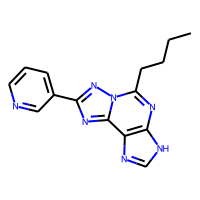
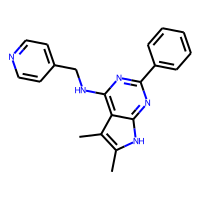
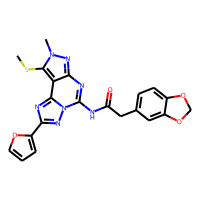
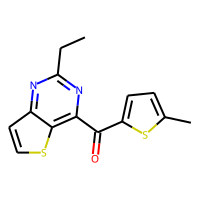
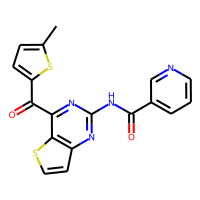

In [9]:
# create PCA for the PPAR dataset and the drug bank dataset
# combine the two dataframes, the first one is the PPAR dataset, the second one is the drug bank dataset, resign the index to avoid duplicate index values
dataframe = pd.concat([df_ppar, df_drugbank], axis=0, ignore_index=True) # combine the two dataframes, the first one is the PPAR dataset, the second one is the drug bank dataset
dataframe

In [10]:

x = dataframe.loc[:, featureList].values
y = dataframe.loc[:, ['label']].values

x = StandardScaler().fit_transform(x) # standardize the data, this is important for PCA, otherwise the results will be biased by the scale of the features

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

variance = pca.explained_variance_ratio_
principalDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDF


,PC1,PC2
0,-1.218839,-1.350921
1,-1.249489,-1.860980
2,1.647523,-2.345898
3,-2.434687,-0.632008
4,-0.585756,-1.779268
...,...,...
2130,-0.990808,2.607410
2131,-1.921605,0.296982
2132,1.174173,-1.427698
2133,9.538968,3.411593


In [11]:

pcaDF = pd.concat([principalDF, dataframe[['label']]], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=featureList)
print(loadings)

                   PC1       PC2
N             0.192624 -0.305267
O             0.315012  0.284068
chiral        0.224515  0.323247
MW            0.368762 -0.122220
heavy_atoms   0.373045 -0.153782
h_acc         0.367764  0.002042
h_don         0.293166  0.191561
logP         -0.095072 -0.309405
TPSA          0.368439  0.106996
numAro        0.080814 -0.503926
formalCharge -0.004999 -0.018653
numRings      0.213828 -0.273076
frac_csp3     0.086038  0.394007
S             0.011751 -0.018542
nHalogens    -0.029584 -0.129378
MR            0.333815 -0.194879


In [12]:
#define the function for plotting pca results
def plot_pca(pcaDF,variance,databases,colors):
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.figsize'] = 5, 5
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=16)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=16)

    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['label'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=5,alpha=0.8)
    axes.legend(databases, fontsize=15, loc='upper left', scatterpoints=5)

    plt.tick_params(labelsize=12)

    axes.set_yticks([-5,0,5,10,15])
    axes.set_xticks([-5,0,5,10,15])
 
    plt.tight_layout()
    plt.show()


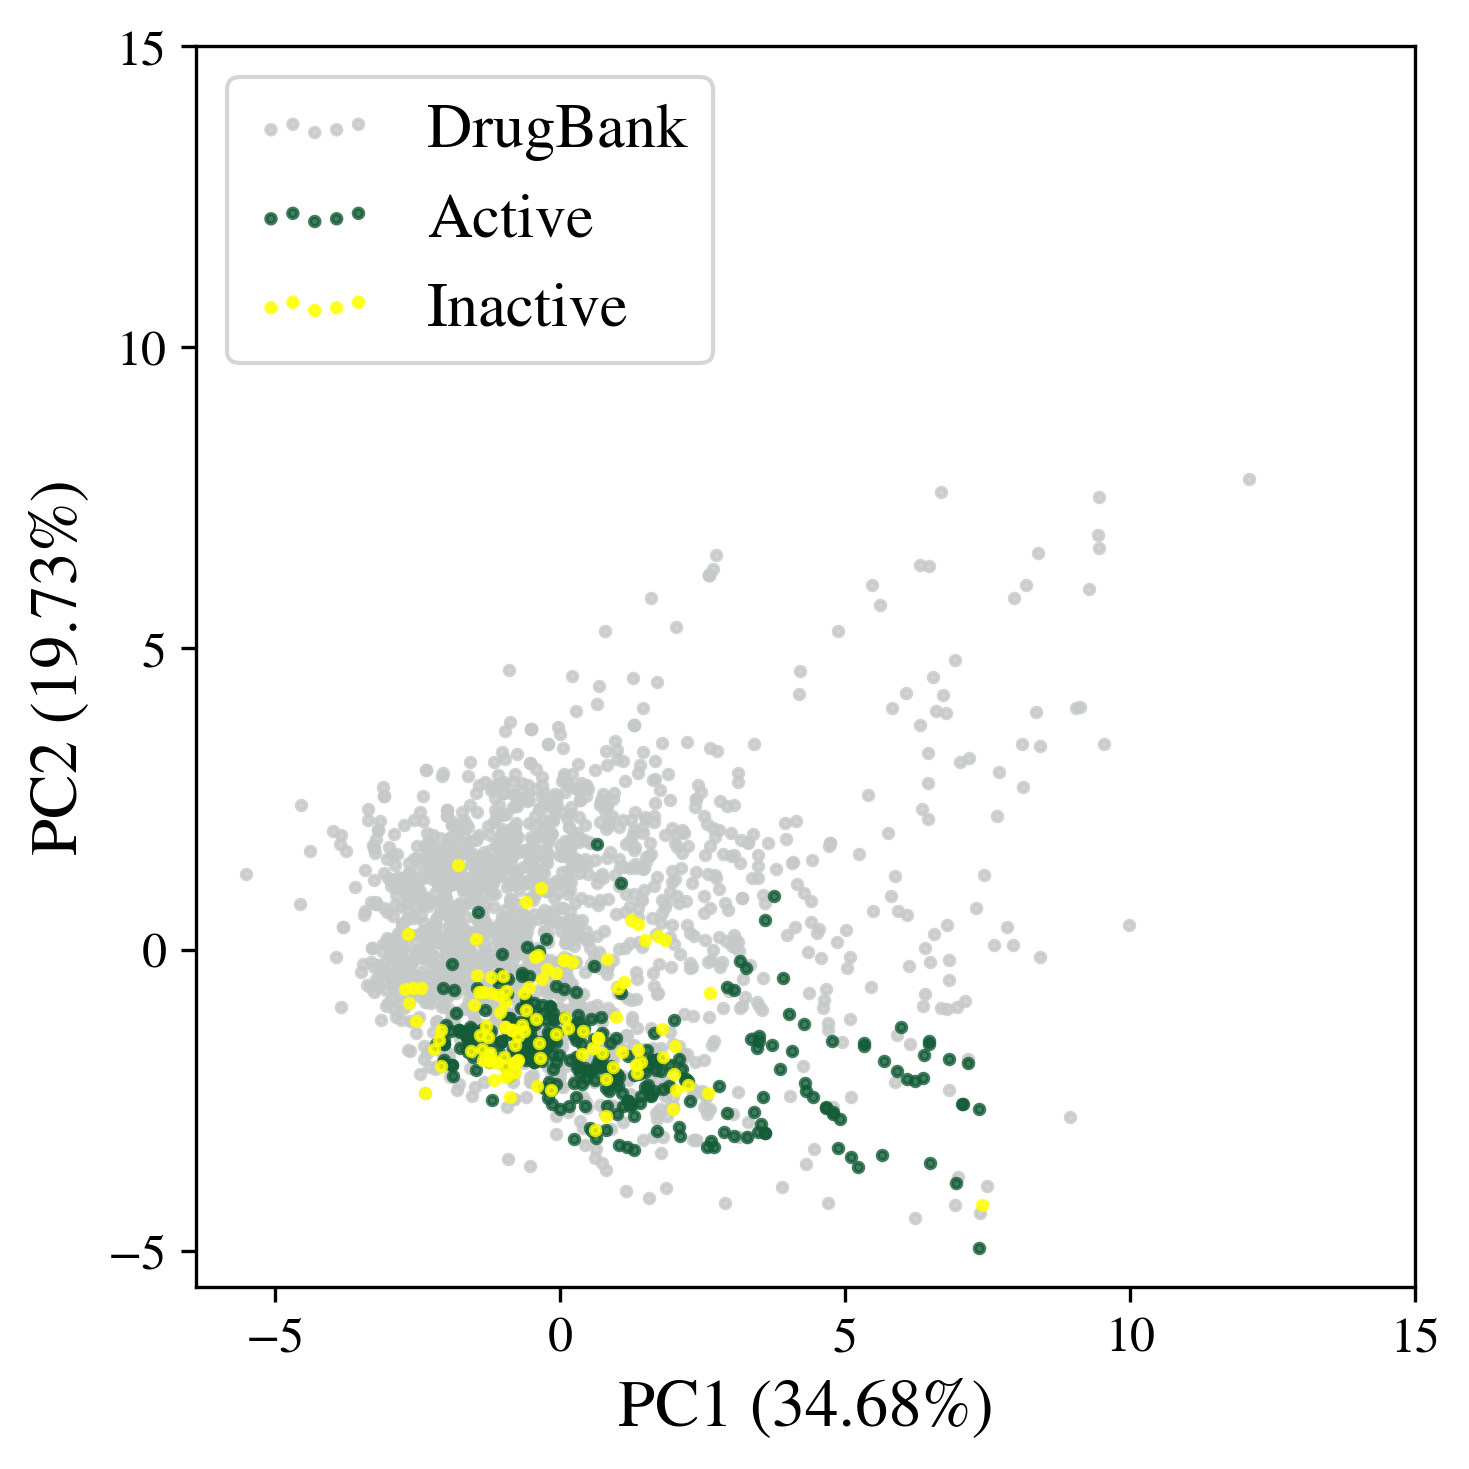

In [13]:
# plot the PCA results
plot_pca(pcaDF,variance,[ 'DrugBank', 'Active', 'Inactive'],['#c5c9c7','#145c37', 'yellow']) # Test whatever color code you want!

### Step 4: Preprocess the data, generate fingerprints as features

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,N,O,chiral,MW,heavy_atoms,h_acc,...,TPSA,numAro,formalCharge,numRings,frac_csp3,S,nHalogens,MR,label,fingerprint
0,CCCCc1nc2[nH]cnc2c2nc(-c3cccnc3)nn12,CHEMBL123195,1,,7,0,0,293.334,22,6,...,84.65,18,0,4,0.267,0,0,82.277,Active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1[nH]c2nc(-c3ccccc3)nc(NCc3ccncc3)c2c1C,CHEMBL81863,0,,5,0,0,329.407,25,4,...,66.49,21,0,4,0.150,0,0,100.362,Inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CSc1c2c(nc(NC(=O)Cc3ccc4c(c3)OCO4)n3nc(-c4ccco...,CHEMBL21572,1,,7,4,0,463.479,33,11,...,121.60,23,0,6,0.190,1,0,119.436,Active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCc1nc(C(=O)c2ccc(C)s2)c2sccc2n1,CHEMBL1077750,0,,2,1,0,288.397,19,5,...,42.85,14,0,3,0.214,2,0,79.282,Inactive,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ..."
4,Cc1ccc(C(=O)c2nc(NC(=O)c3cccnc3)nc3ccsc23)s1,CHEMBL1078001,1,,4,2,0,380.454,26,7,...,84.84,20,0,4,0.056,2,0,102.094,Active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ..."

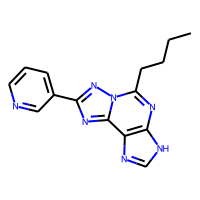
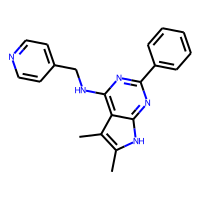
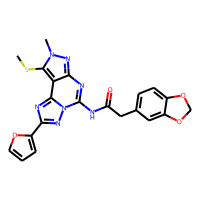
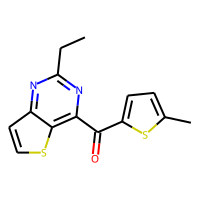
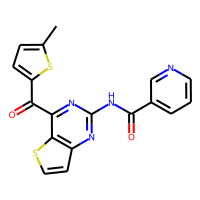

In [14]:
# Define a function for generating Morgan fingerprints for each molecule
def mol2fingerprint(mol):
    # Generate Morgan fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    ConvertToNumpyArray(fp, arr)
    return arr

# Apply the function, generate Morgan fingerprints for each molecule in the dataset
df_ppar['fingerprint'] = df_ppar['preprocessedSmiles'].apply(lambda x: mol2fingerprint(Chem.MolFromSmiles(x)))

# Check the first few rows of the dataframe
df_ppar.head(5)

/tmp/ipykernel_1504908/2725541945.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ppar[morgan2_cols] = df_ppar.fingerprint.to_list()
/tmp/ipykernel_1504908/2725541945.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_ppar[morgan2_cols] = df_ppar.fingerprint.to_list()
/tmp/ipykernel_1504908/2725541945.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

,preprocessedSmiles,Molecule ChEMBL ID,y_true_label,Molecule,N,O,chiral,MW,heavy_atoms,h_acc,...,morgan2_b2038,morgan2_b2039,morgan2_b2040,morgan2_b2041,morgan2_b2042,morgan2_b2043,morgan2_b2044,morgan2_b2045,morgan2_b2046,morgan2_b2047
0,CCCCc1nc2[nH]cnc2c2nc(-c3cccnc3)nn12,CHEMBL123195,1,,7,0,0,293.334,22,6,...,0,0,0,0,0,0,0,0,0,0
1,Cc1[nH]c2nc(-c3ccccc3)nc(NCc3ccncc3)c2c1C,CHEMBL81863,0,,5,0,0,329.407,25,4,...,0,0,0,0,0,0,0,0,0,0
2,CSc1c2c(nc(NC(=O)Cc3ccc4c(c3)OCO4)n3nc(-c4ccco...,CHEMBL21572,1,,7,4,0,463.479,33,11,...,0,0,0,0,0,0,0,0,0,0
3,CCc1nc(C(=O)c2ccc(C)s2)c2sccc2n1,CHEMBL1077750,0,,2,1,0,288.397,19,5,...,0,0,0,0,0,0,0,0,0,0
4,Cc1ccc(C(=O)c2nc(NC(=O)c3cccnc3)nc3ccsc23)s1,CHEMBL1078001,1,,4,2,0,380.454,26,7,...,0,0,0,0,0,0,0,0,0,0

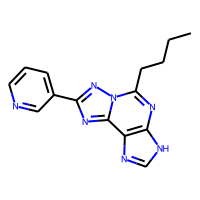
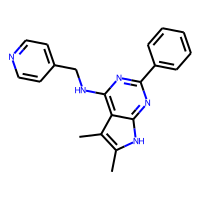
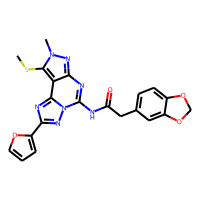
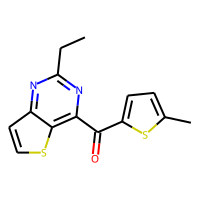
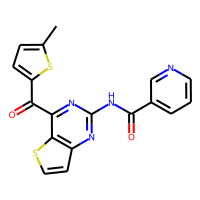

In [15]:
# split the fingerprint into different columns，as each bit is a separate feature
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
df_ppar[morgan2_cols] = df_ppar.fingerprint.to_list()
df_ppar.head(5)

### Step 5: Train and Evaluate ML Model (Random Forest)

In [16]:
# split the dataset into training and test sets, with stratification based on the y_true_label
train_df, test_df = train_test_split(df_ppar, test_size=0.2, random_state=42, stratify=df_ppar['y_true_label'])

In [17]:
# Make sure morgan2_cols is defined
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
X_train = train_df[morgan2_cols] 
y_train = train_df.y_true_label
X_test = test_df[morgan2_cols]
y_test = test_df.y_true_label


In [18]:
# Train the RF mdodel
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

<Figure size 1000x800 with 0 Axes>

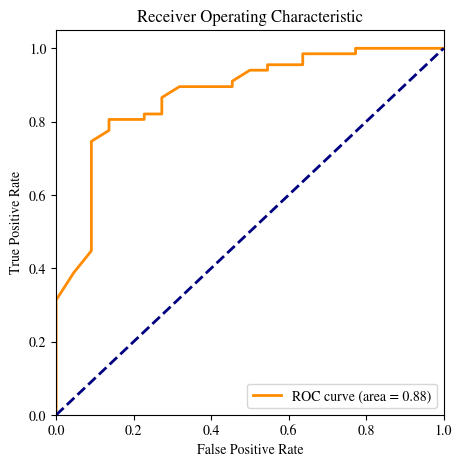

In [19]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 8))
model = rf

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(test_df[morgan2_cols])[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(test_df['y_true_label'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Step 6: Screening the DrugBank database

In [20]:
# generate the predictions for the drug bank database, before that, we need to generate the fingerprints for the drug bank database
df_drugbank['fingerprint'] = df_drugbank['preprocessedSmiles'].apply(lambda x: mol2fingerprint(Chem.MolFromSmiles(x)))
df_drugbank[morgan2_cols] = df_drugbank.fingerprint.to_list()
X = df_drugbank[morgan2_cols]
predictions_proba = model.predict_proba(X)[:, 1]
df_drugbank['Predicted_result'] = predictions_proba


/tmp/ipykernel_1504908/623243033.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_drugbank[morgan2_cols] = df_drugbank.fingerprint.to_list()
/tmp/ipykernel_1504908/623243033.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_drugbank[morgan2_cols] = df_drugbank.fingerprint.to_list()
/tmp/ipykernel_1504908/623243033.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

,preprocessedSmiles,DATABASE_ID,N,O,chiral,MW,heavy_atoms,h_acc,h_don,logP,...,morgan2_b2040,morgan2_b2041,morgan2_b2042,morgan2_b2043,morgan2_b2044,morgan2_b2045,morgan2_b2046,morgan2_b2047,Predicted_result,mol
0,C[S+](CCC(N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(N)nc...,DB00118,6,5,6,399.453,27,10,5,-1.922,...,0,0,0,0,0,0,0,0,0.70,
1,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[PH](=O)(=O)O)[C...,DB00131,5,7,4,347.224,23,11,4,-1.693,...,0,0,0,0,0,0,0,0,0.72,
2,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O,DB00132,0,2,0,278.436,20,1,1,5.661,...,0,0,0,0,0,0,0,0,0.12,
3,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,DB00136,0,3,6,416.646,30,3,3,5.705,...,0,0,0,0,0,0,0,0,0.30,
4,CC1=C[C@H](O)CC(C)(C)[C@H]1/C=C/C(C)=C/C=C/C(C...,DB00137,0,2,3,568.886,42,2,2,10.403,...,0,0,0,0,0,0,0,0,0.42,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,O=[PH](=O)(O)C(O)(Cn1ccnc1)[PH](=O)(=O)O,DB16907,2,7,0,272.090,16,7,3,-0.774,...,0,0,0,0,0,0,0,0,0.32,
1688,CCNCc1nc2c(O)c(Cl)cc(Cl)c2c(=O)n1C,DB16965,3,2,0,302.161,19,5,2,2.055,...,0,0,0,0,0,0,0,0,0.56,
1689,COc1cc(F)c(-n2c(=O)[nH]c3csc(C(=O)O)c3c2=O)cc1...,DB17083,2,7,0,508.430,35,8,2,3.452,...,0,0,0,0,0,0,0,0,0.30,
1690,O=C(CCC(C(=O)O)N1CCN(C(CCC(=O)NCC(O)CO)C(=O)O)...,DB17084,7,15,6,815.875,57,16,12,-4.890,...,0,0,0,0,0,0,0,0,0.78,

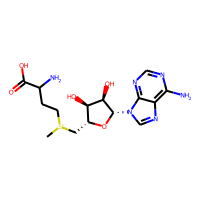
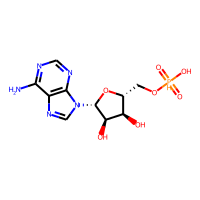
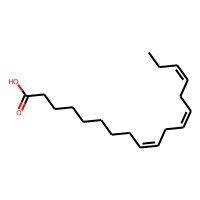
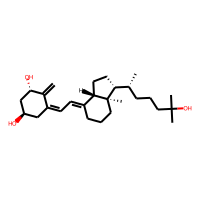
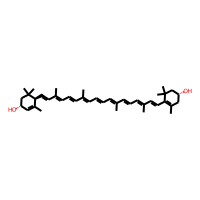
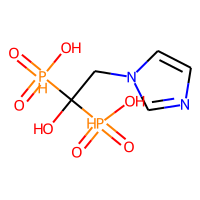
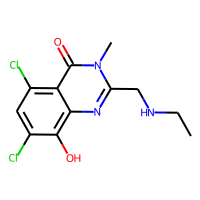
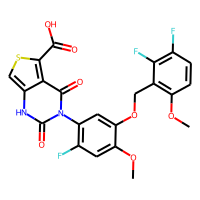
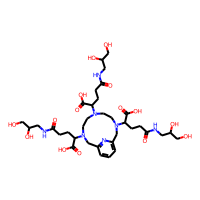
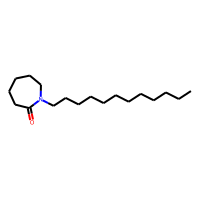

In [21]:
# add rdkit molecule object to the drug bank dataframe for visualization
df_drugbank = df_drugbank.assign(mol=df_drugbank['preprocessedSmiles'].apply(Chem.MolFromSmiles))   
df_drugbank

,DATABASE_ID,mol,Predicted_result
626,DB01073,,0.88
35,DB00203,,0.86
1628,DB14840,,0.86
1647,DB15305,,0.86
217,DB00457,,0.84
189,DB00425,,0.84
768,DB01280,,0.84
204,DB00442,,0.84
1584,DB14202,,0.82
1136,DB08966,,0.82

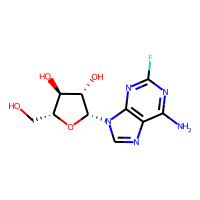
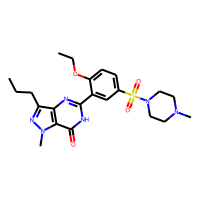
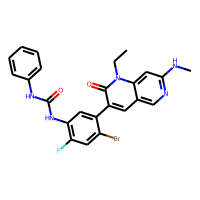
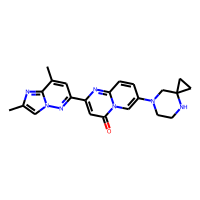
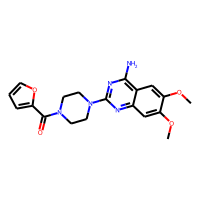
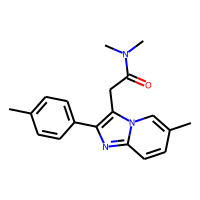
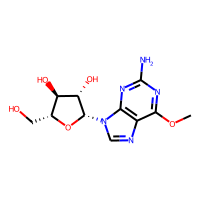
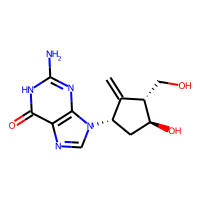
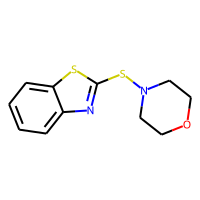
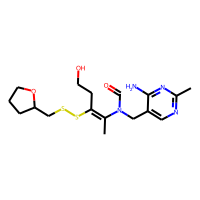
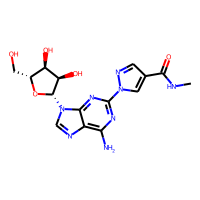
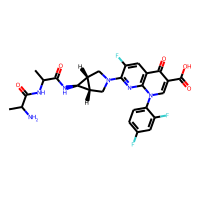
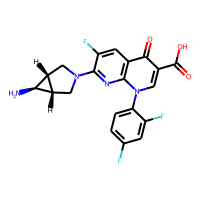
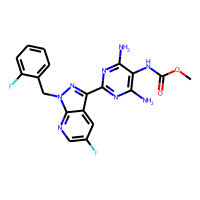
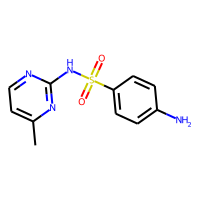
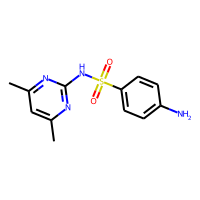
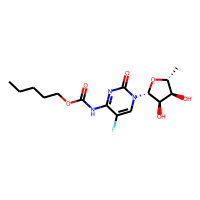
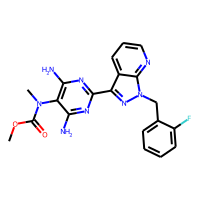
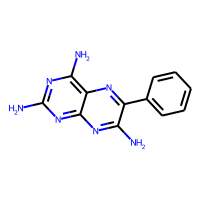
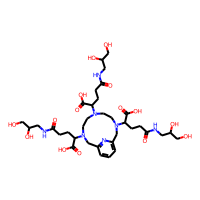

In [22]:
# Check the top 20 predictions
df_drugbank[['DATABASE_ID','mol', 'Predicted_result']].sort_values(by='Predicted_result', ascending=False).head(20)
# check the database_id from the drugbank website: https://go.drugbank.com/
# does your model suggest any useful/interesting compounds? :) 

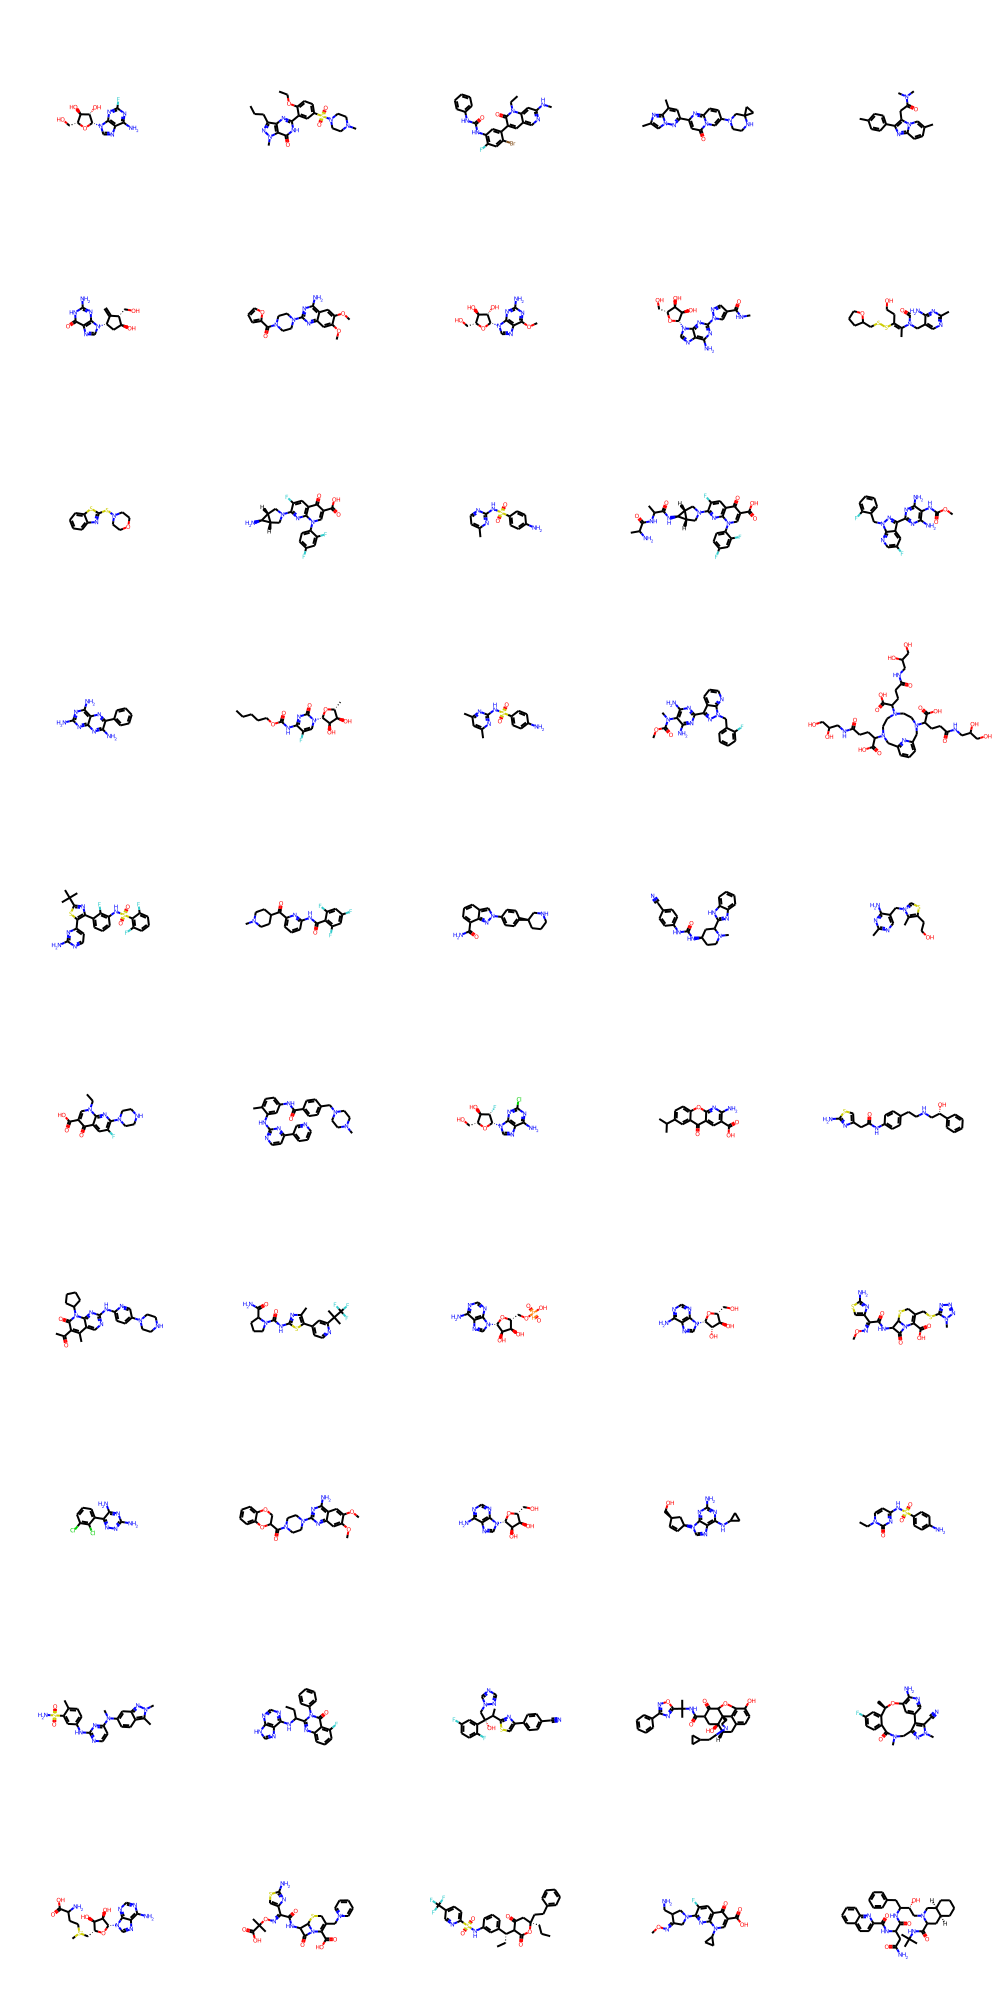

In [23]:
# show the top 20 predictions in rdkit gird
def show_top_50_predictions(df, column):
    # Get the top 50 predictions
    top_50 = df.nlargest(50, column)
    
    # Create a list of molecules
    mols = [Chem.MolFromSmiles(smiles) for smiles in top_50['preprocessedSmiles']]
    
    # Draw the molecules in a grid
    img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))
    
    return img
# Display the top 20 predictions
img = show_top_50_predictions(df_drugbank, 'Predicted_result')
img

In [24]:
# KNN instead of RF
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

<Figure size 1000x800 with 0 Axes>

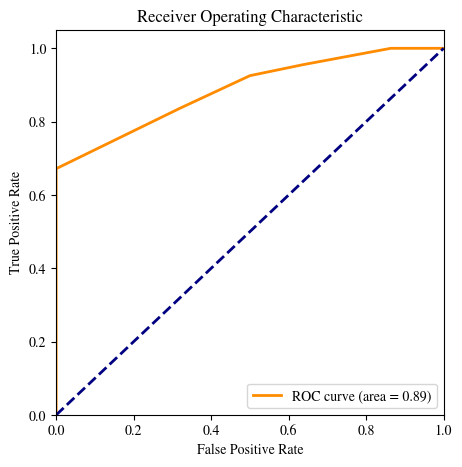

In [25]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 8))
model = knn

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(test_df[morgan2_cols])[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(test_df['y_true_label'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
# XGBoost instead of RF

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=42)
xgb.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<Figure size 1000x800 with 0 Axes>

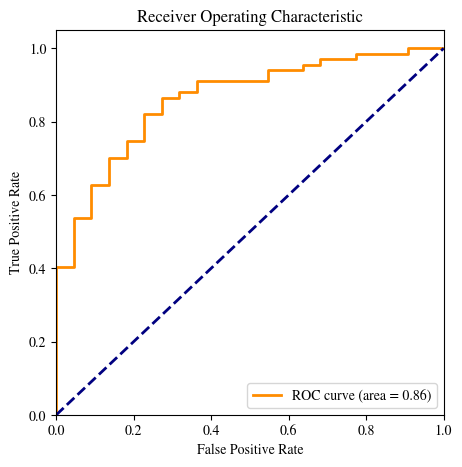

In [27]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 8))
model = xgb

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(test_df[morgan2_cols])[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(test_df['y_true_label'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# neural network instead of RF
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                     random_state=42, solver='adam', activation='relu')
nn.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

<Figure size 1000x800 with 0 Axes>

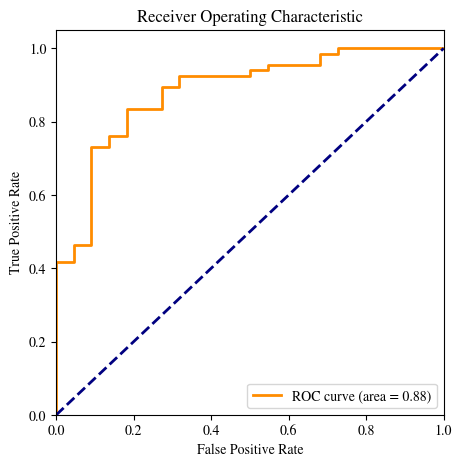

In [29]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 8))
model = nn  

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(test_df[morgan2_cols])[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(test_df['y_true_label'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()